# 2. Supervised Learning
## 2.3 Supervised Machine Learning Algorithms

In [1]:
from IPython.display import display
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

## 2.3.2 k-Nearest Neighbor
### k-Neighbors Classification

##### n_neighbors=1 : 이웃이 하나인 경우

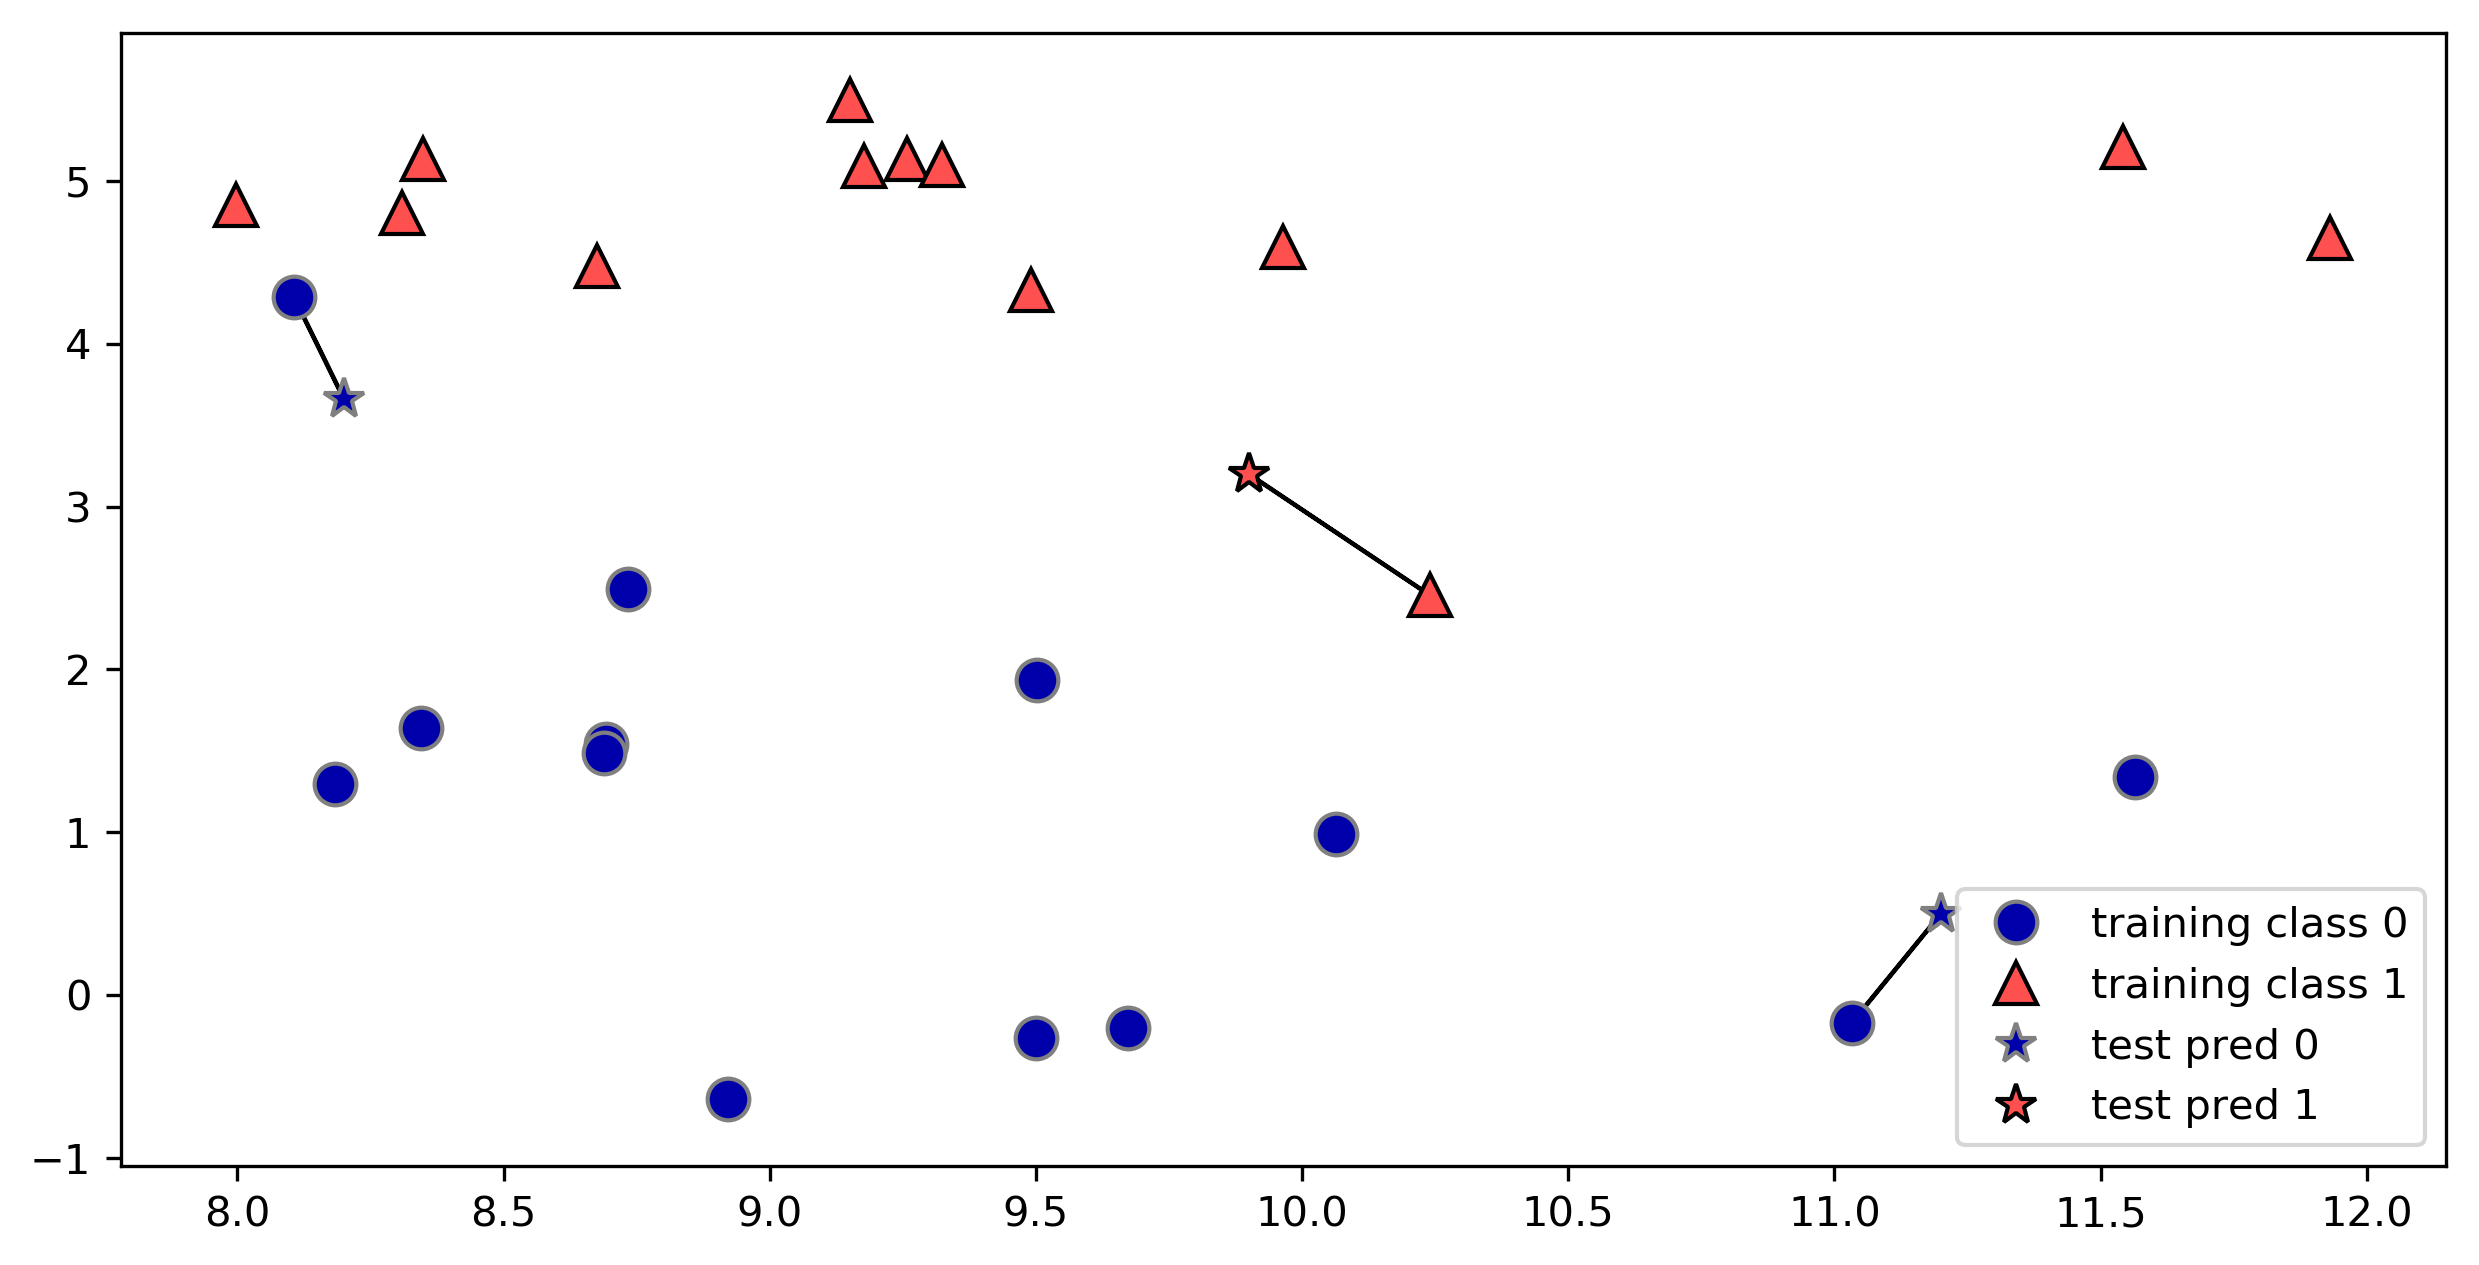

In [12]:
plt.figure(figsize=(10, 5))
mglearn.plots.plot_knn_classification(n_neighbors=1)

##### n_neighbors=3 : 이웃이 셋인 경우

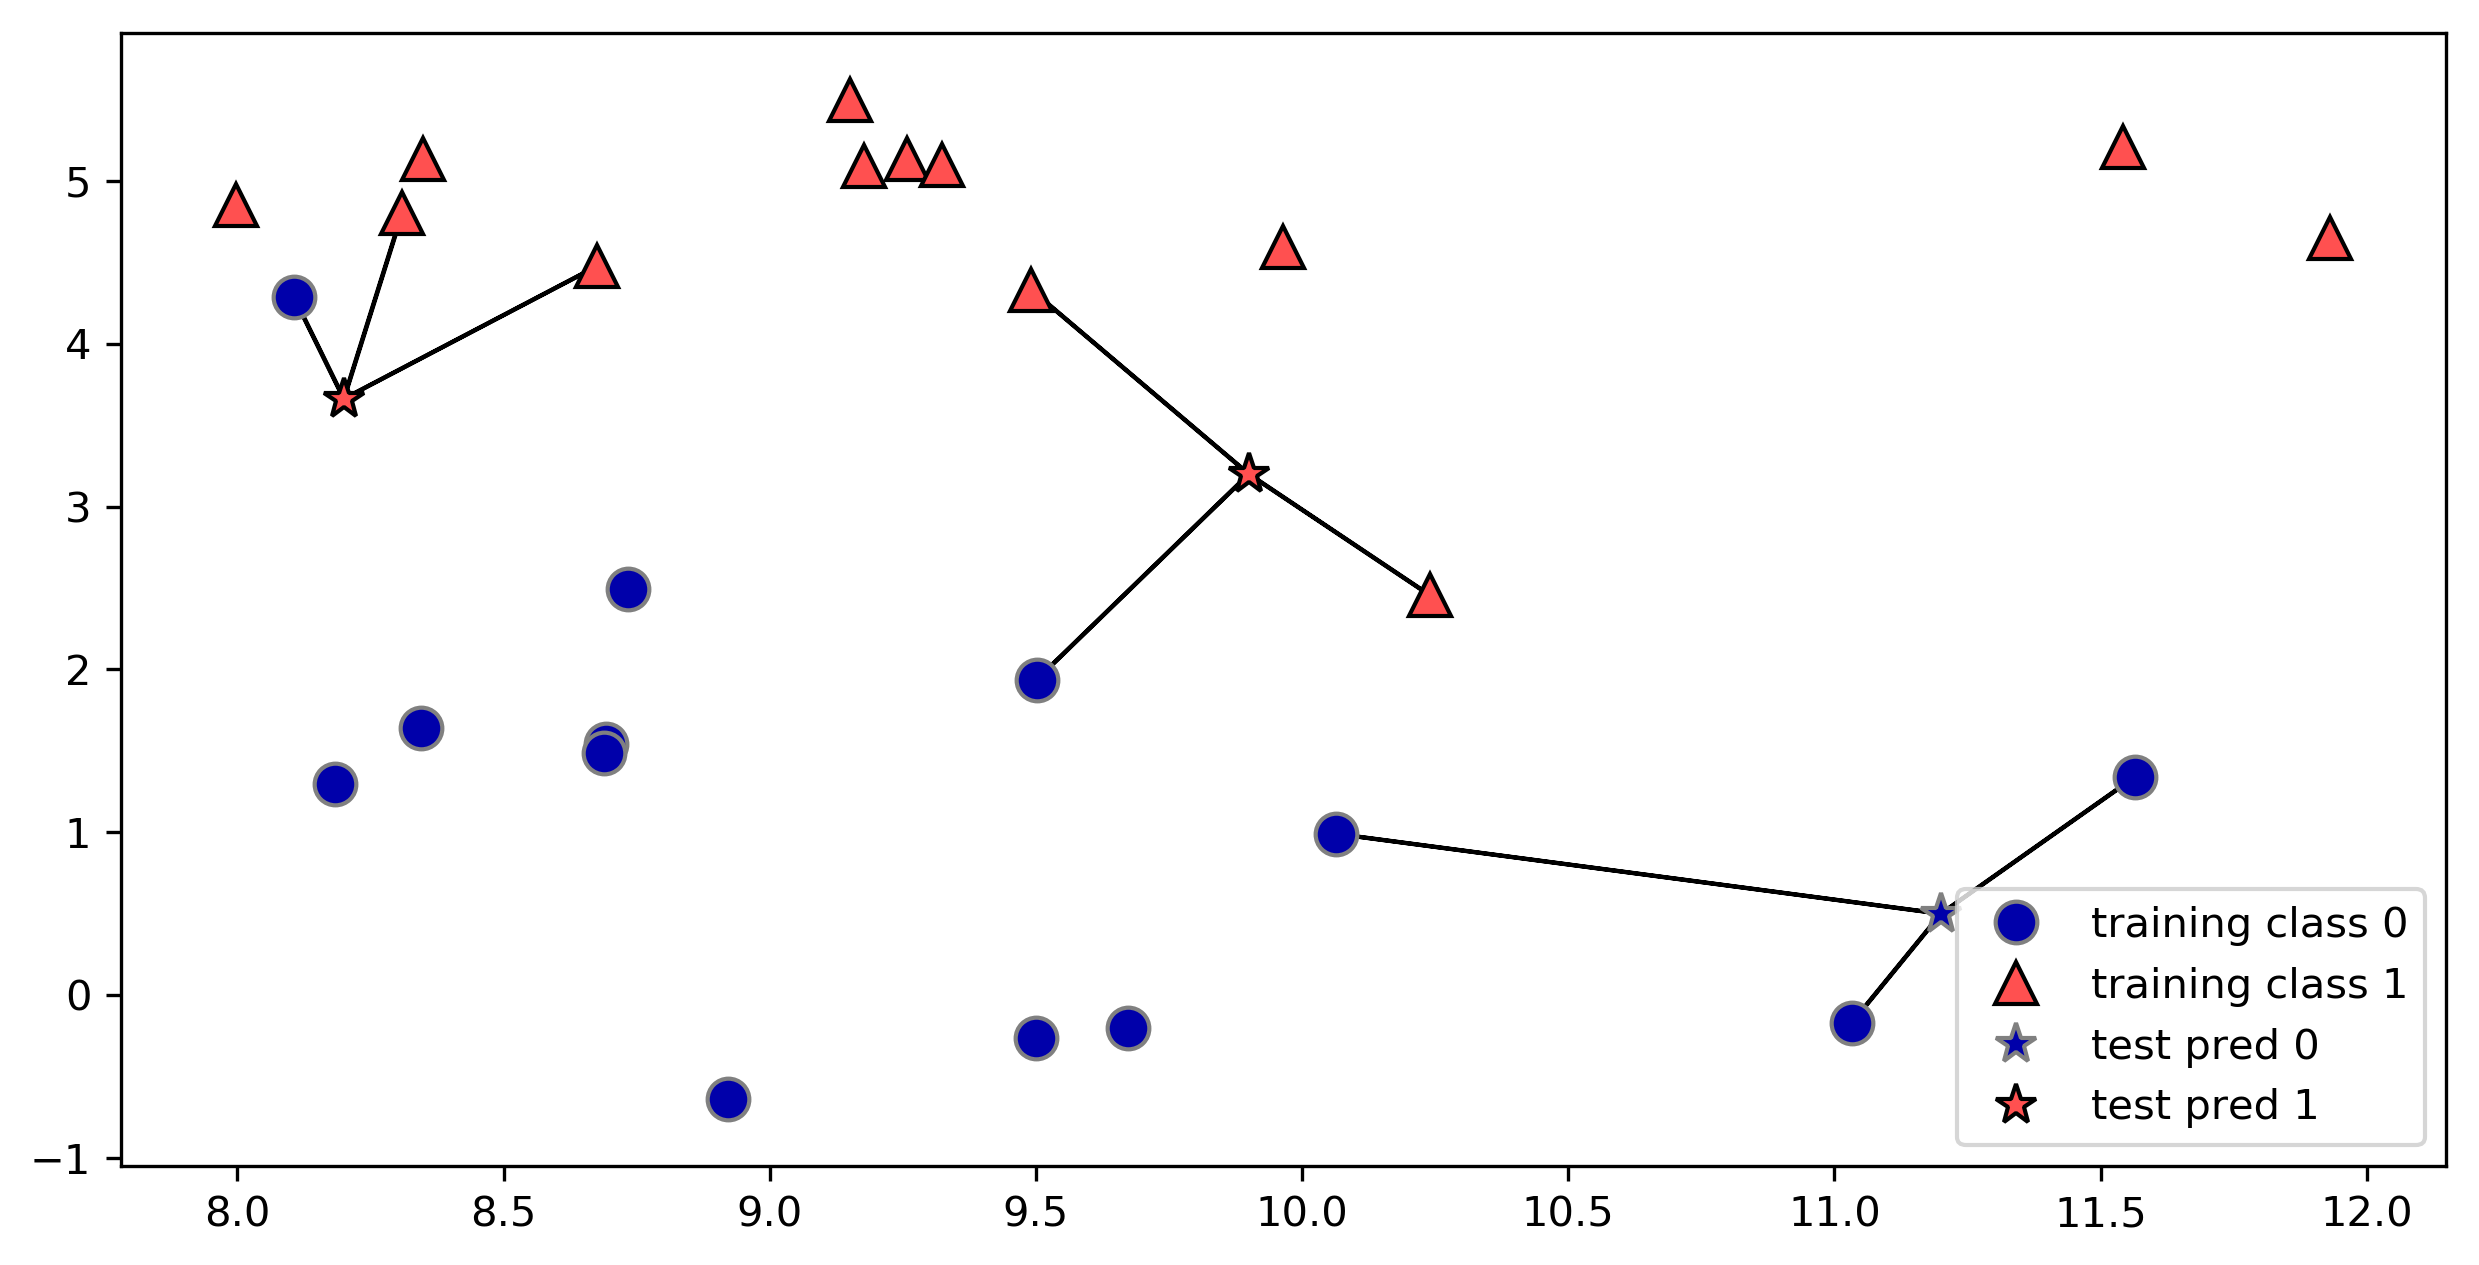

In [13]:
plt.figure(figsize=(10, 5))
mglearn.plots.plot_knn_classification(n_neighbors=3)

- 투표랑 비슷함
- 이웃의 개수는 되도록 홀수로 선택하는 게 좋을 것 같음

##### 성능 테스트

In [4]:
from sklearn.model_selection import train_test_split
# X --> (26, 2)
# Y --> (26,)
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train shape: {}".format(X_train.shape)) # 훈련 데이터셋
print("y_train shape: {}".format(y_train.shape)) # 훈련 데이터셋의 라벨 데이터셋

print()

print("X_test shape: {}".format(X_test.shape)) # 테스트 데이터셋
print("y_test shape: {}".format(y_test.shape)) # 테스트 데이터셋의 라벨 데이터셋

X_train shape: (19, 2)
y_train shape: (19,)

X_test shape: (7, 2)
y_test shape: (7,)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) # 이웃이 셋인 경우

In [6]:
clf.fit(X_train, y_train) # 훈련 데이터셋을 훈련 데이터셋의 라벨 데이터셋으로 fitting/학습 시킨다.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
clf.predict(X_test) # 테스트 데이터셋을 이용하여 예측치를 내본다.

array([1, 0, 1, 0, 1, 0, 0])

In [9]:
clf.score(X_test, y_test) # 테스트 데이터셋과 테스트 데이터셋의 라벨 데이터셋인 실제값을 이용하여 정확도를 측정한다.

0.8571428571428571

##### 이웃의 개수에 따른 정확도 비교

In [26]:
clfDict = {}
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=i)
    clfDict[i] = clf
    clfDict[i].fit(X_train, y_train)
    print("이웃이 {:2d}인 경우의 정확도: {}".format(i, clfDict[i].score(X_test, y_test)))

print(end="\n\n")

clfDict = {}
for i in range(1, 11):
    X, y = mglearn.datasets.make_forge()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf = KNeighborsClassifier(n_neighbors=i)
    clfDict[i] = clf
    clfDict[i].fit(X_train, y_train)
    print("이웃이 {:2d}인 경우의 정확도: {}".format(i, clfDict[i].score(X_test, y_test)))
    
print(end="\n\n")

clfDict = {}
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    clfDict[i] = clf
    print("이웃이 {:2d}인 경우의 정확도: {}".format(i, clfDict[i].score(X_test, y_test)))

이웃이  1인 경우의 정확도: 0.8571428571428571
이웃이  2인 경우의 정확도: 0.8571428571428571
이웃이  3인 경우의 정확도: 0.8571428571428571
이웃이  4인 경우의 정확도: 0.8571428571428571
이웃이  5인 경우의 정확도: 0.8571428571428571
이웃이  6인 경우의 정확도: 0.8571428571428571
이웃이  7인 경우의 정확도: 0.8571428571428571
이웃이  8인 경우의 정확도: 0.8571428571428571
이웃이  9인 경우의 정확도: 0.8571428571428571
이웃이 10인 경우의 정확도: 0.8571428571428571


이웃이  1인 경우의 정확도: 0.8571428571428571
이웃이  2인 경우의 정확도: 0.8571428571428571
이웃이  3인 경우의 정확도: 0.8571428571428571
이웃이  4인 경우의 정확도: 0.8571428571428571
이웃이  5인 경우의 정확도: 0.8571428571428571
이웃이  6인 경우의 정확도: 0.8571428571428571
이웃이  7인 경우의 정확도: 0.8571428571428571
이웃이  8인 경우의 정확도: 0.8571428571428571
이웃이  9인 경우의 정확도: 0.8571428571428571
이웃이 10인 경우의 정확도: 0.8571428571428571


이웃이  1인 경우의 정확도: 0.8571428571428571
이웃이  2인 경우의 정확도: 0.8571428571428571
이웃이  3인 경우의 정확도: 0.8571428571428571
이웃이  4인 경우의 정확도: 0.8571428571428571
이웃이  5인 경우의 정확도: 0.8571428571428571
이웃이  6인 경우의 정확도: 0.8571428571428571
이웃이  7인 경우의 정확도: 0.8571428571428571
이웃이  8인 경우의 정확도: 0.85714

- 정확도가 왜 전부 똑같지?

- clf.score() outputs 'R²' score
  - 1.0 : Perfect Prediction
  - 0.0 : Prediction to the mean of the given y values 
  - $R^2 = 1 - {\frac{RSS}{TSS}}$
    - RSS is the residual sum of squares $∑(y - f(x))²$
    - TSS is the total sum of squares $∑(y - mean(y))²$.

### Analyzing KNeighborsClassifier

##### 결정 경게(decision boundary) 살펴보기

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
axes # 3개의 객체를 담은 하나의 리스트

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c13629da0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1c13693470>], dtype=object)

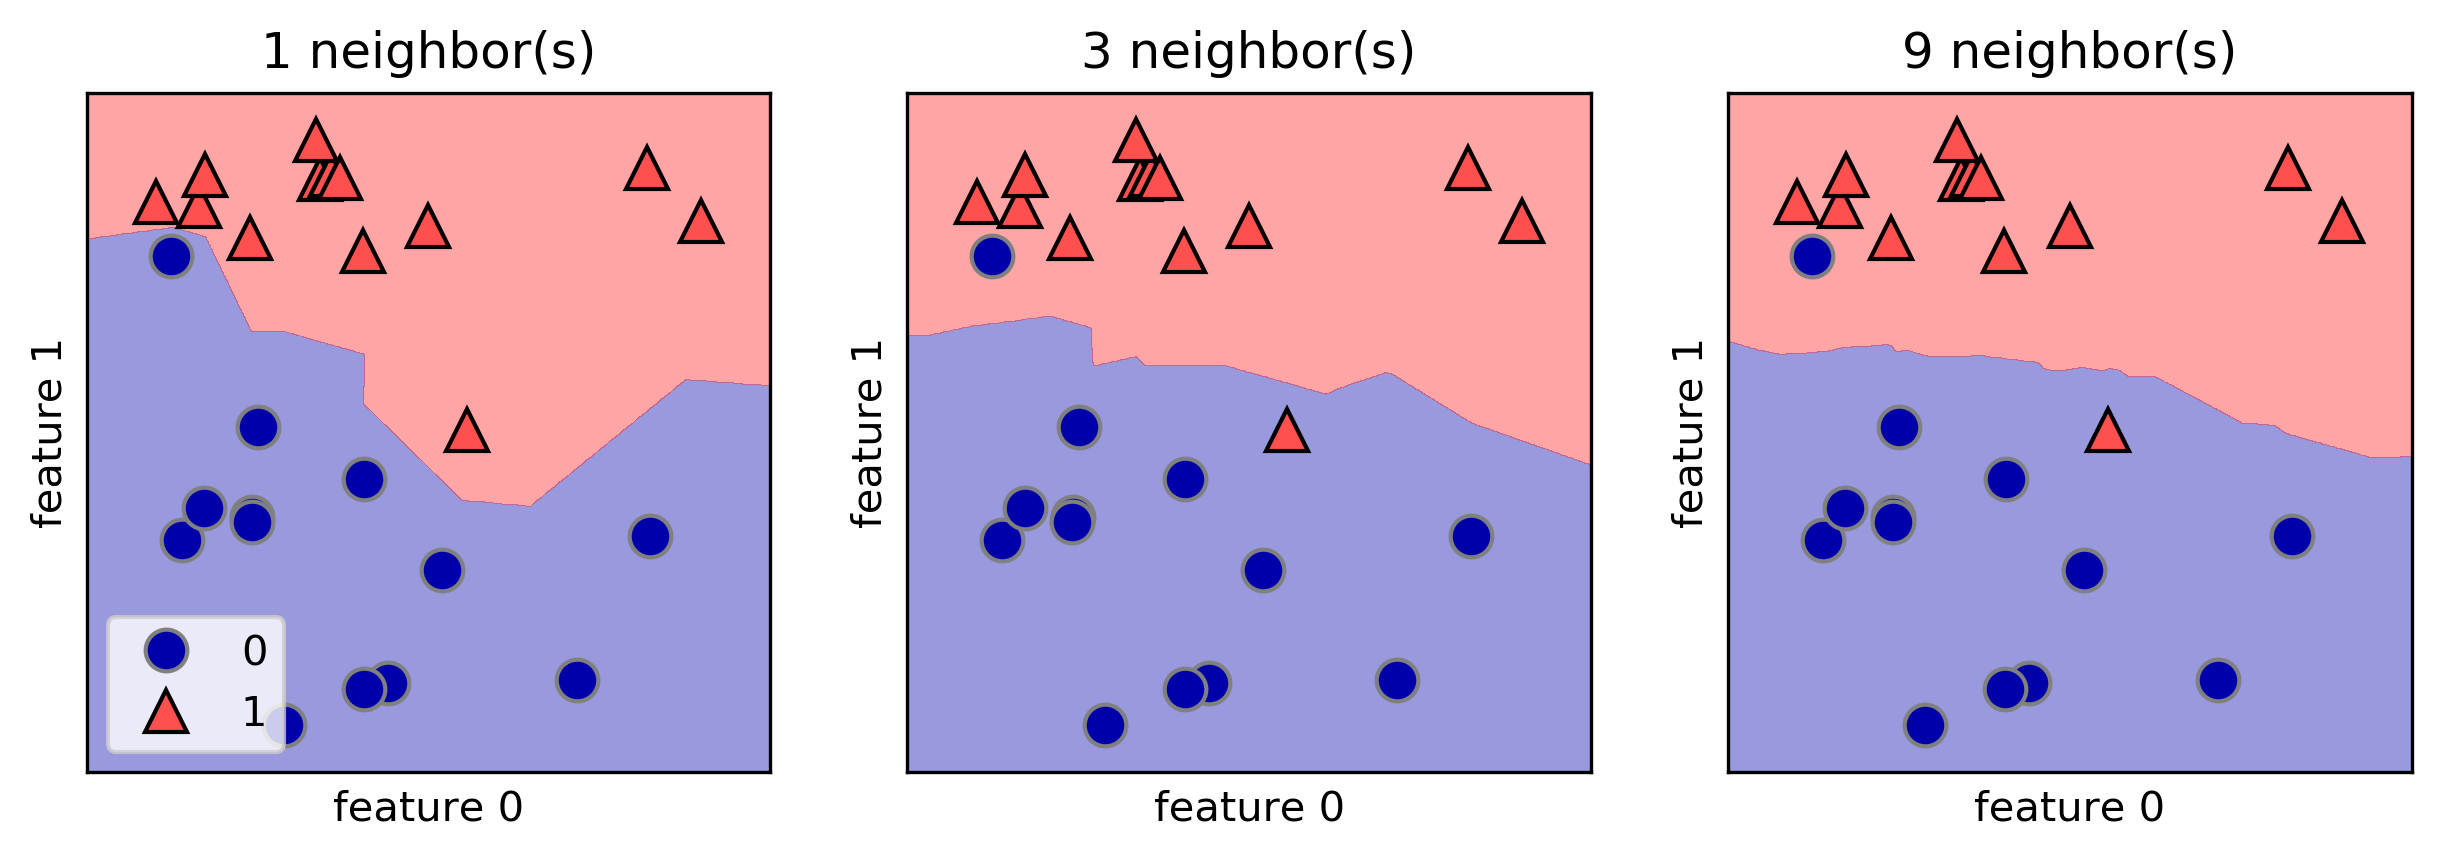

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

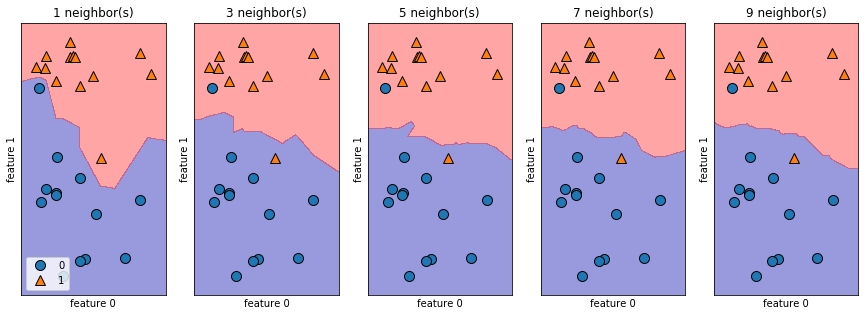

In [41]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for n_neighbors, ax in zip([1, 3, 5, 7, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

- 이웃이 늘어날수록 결정 경계가 부드러워지는데, 이는 곧 더 단순한 모델임을 의미한다.
- 이웃 하나만을 고려할 땐 지나치게 과적합된 것으로 이해할 수 있다.
- 이웃의 개수가 모델의 복잡도를 결정한다.

##### 유방암 데이터셋을 이용하여 성능 평가
- 이웃의 개수를 달리하여 모델의 성능을 평가하고자 함

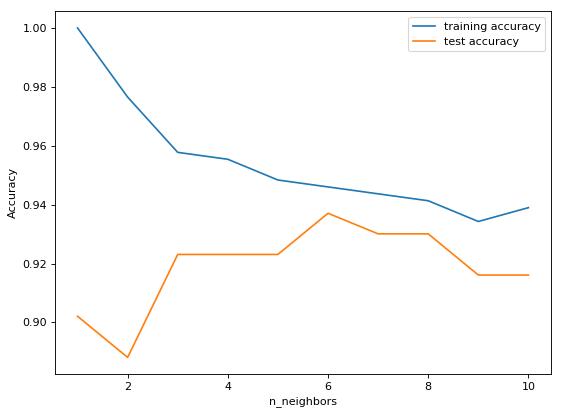

In [43]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target, 
    
    stratify=cancer.target, 
    # stratify: cancer.target데이터의 비율을 살펴서 split해줌으로써 지나치게 특정 라벨의 데이터만 들어가는 것을 사전에 방지한다.
    
    random_state=66
)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train)) # 훈련 데이터에 대한 Accuracy
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test)) # 테스트 데이터에 대한 Accuracy

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

- 훈련 데이터셋에 대해서 정확도가 점점 낮아지는데, 이는 고려하고자 하는 이웃의 개수가 늘어날수록 정확도가 낮아진다는 것을 의미하며 타당해보인다.
- 테스트 데이터셋에 대한 정확도의 결과에 의하면 모델의 복잡도가 지나치게 높거나, 지나치게 낮을 경우 모두 정확도가 낮다.
- k=6일 때 Accuracy가 가장 높기 때문에 현재 결과에 의하면 이웃의 개수는 6이 가장 적합하다고 판단할 수 있다.

### k-Neighbors Regression

- kNN 알고리즘은 분류뿐만 아니라 회귀에도 사용할 수 있다.

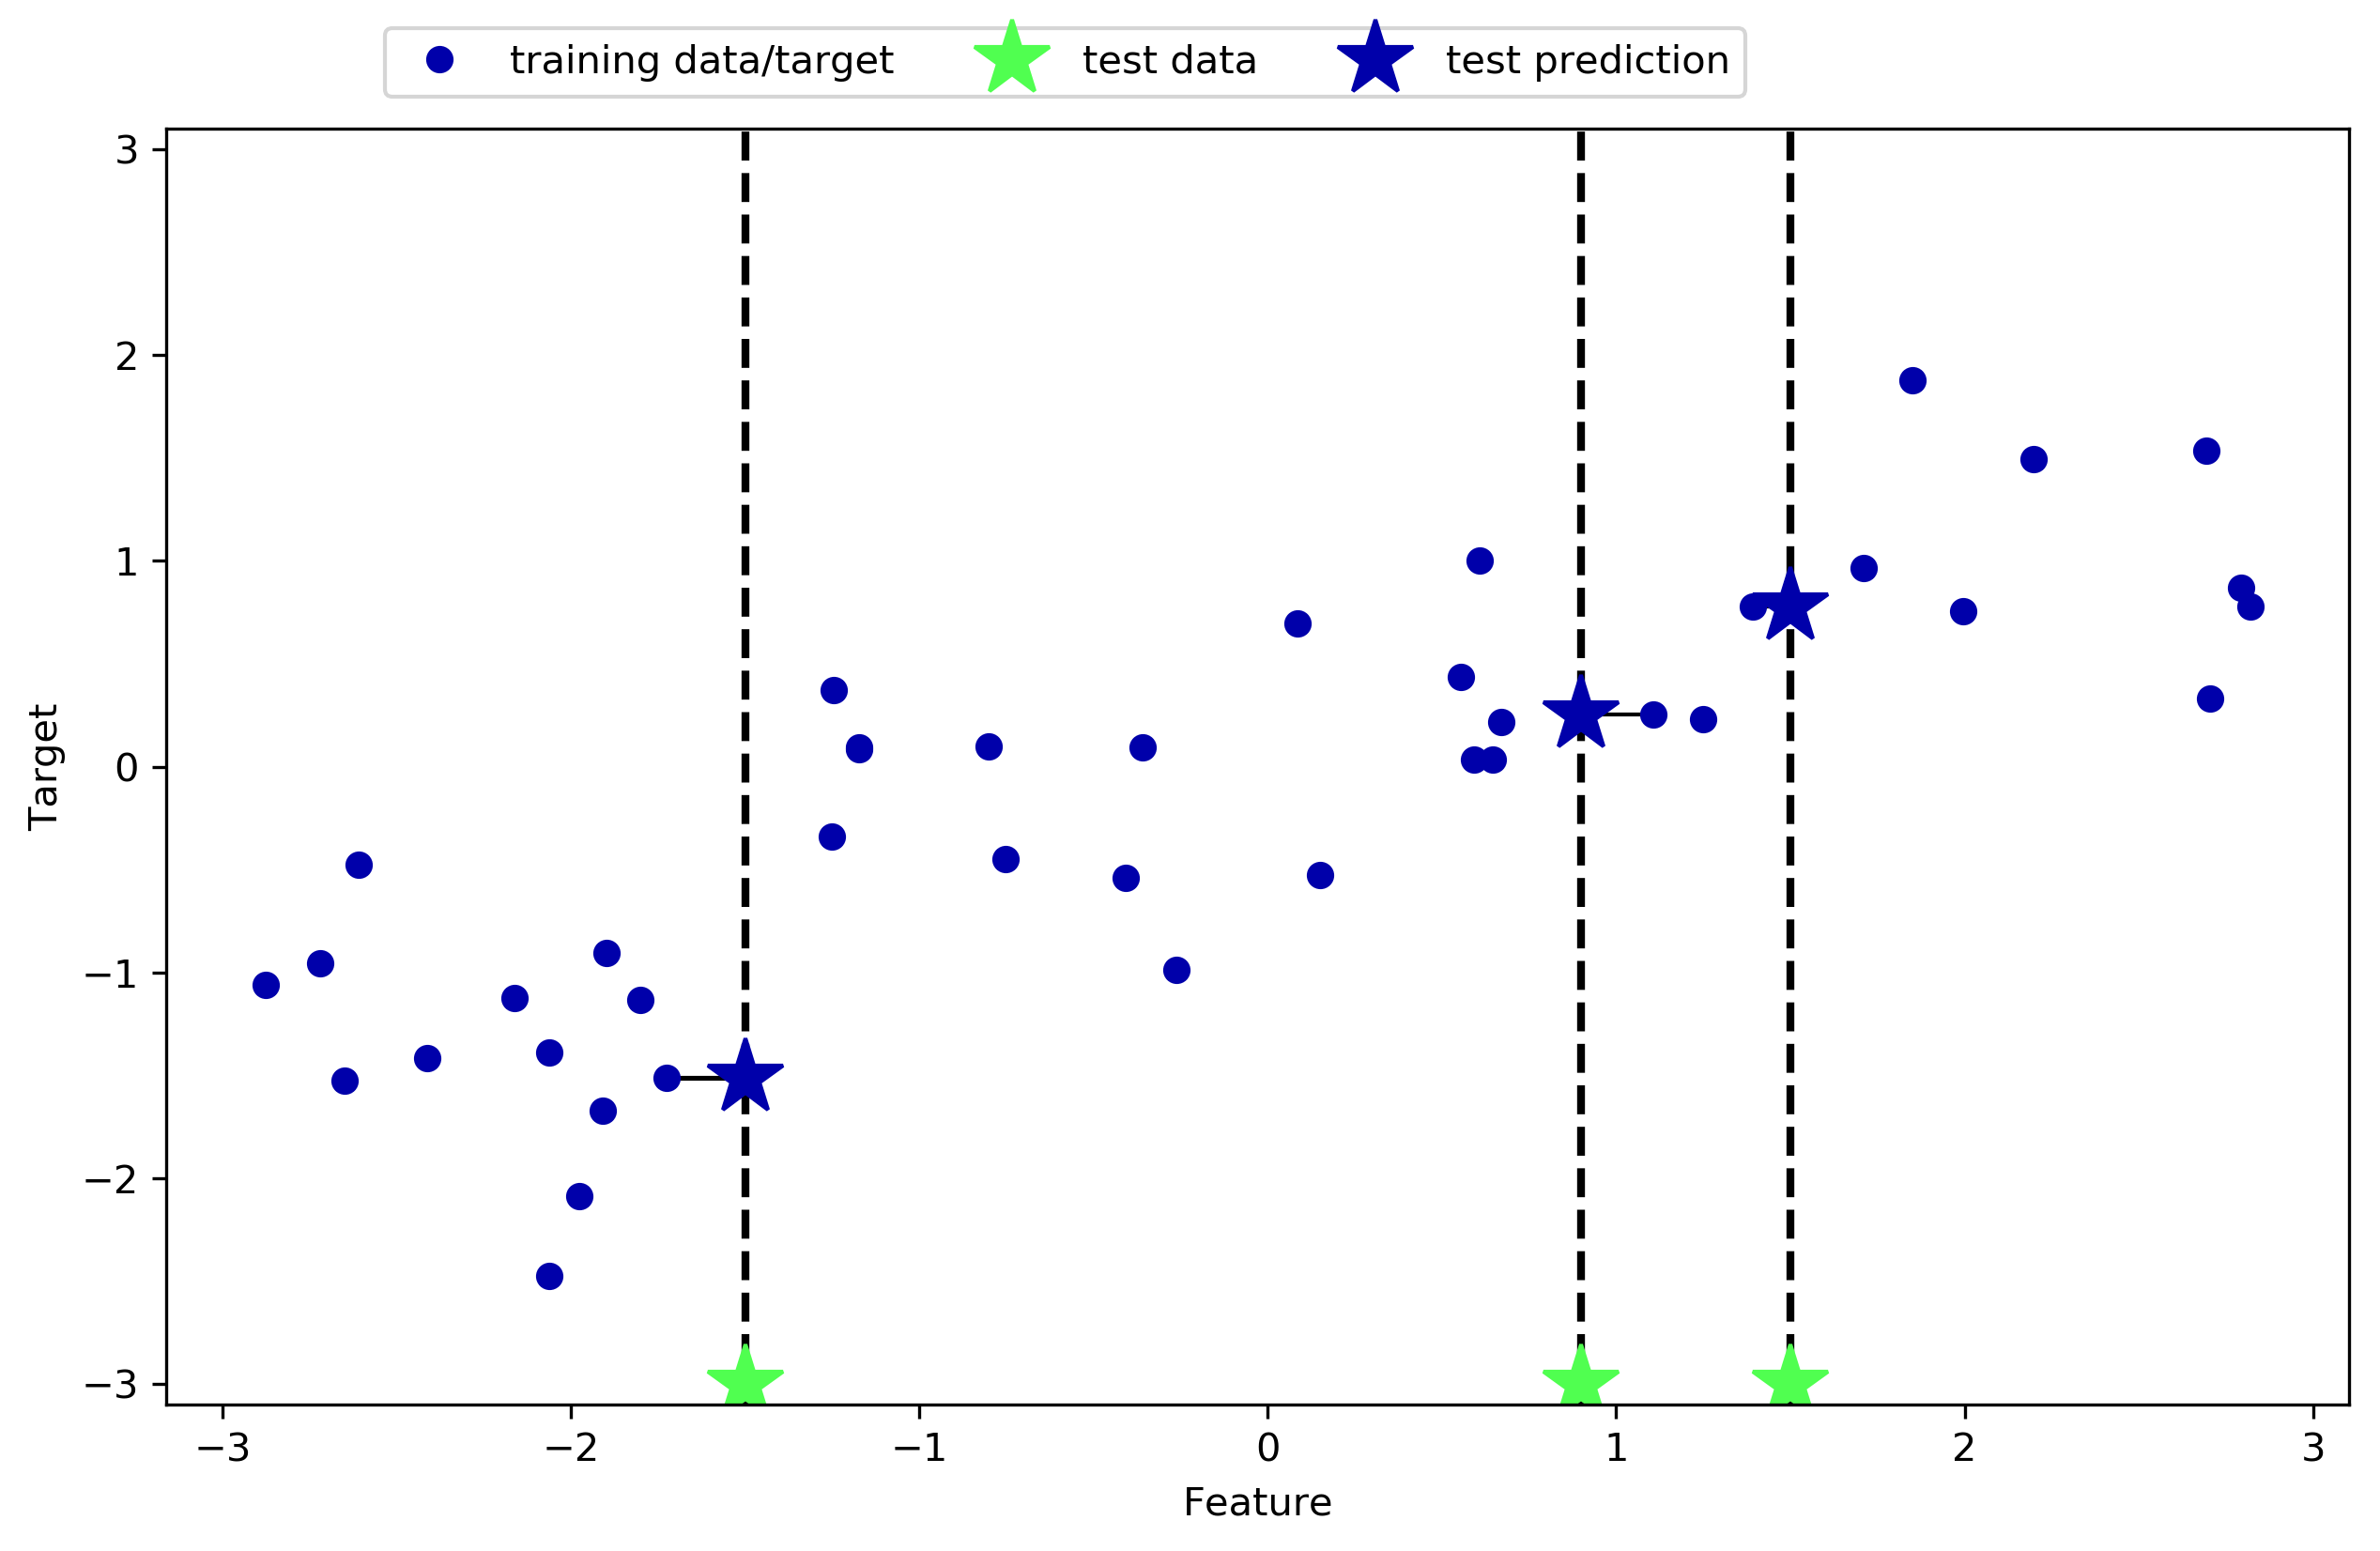

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

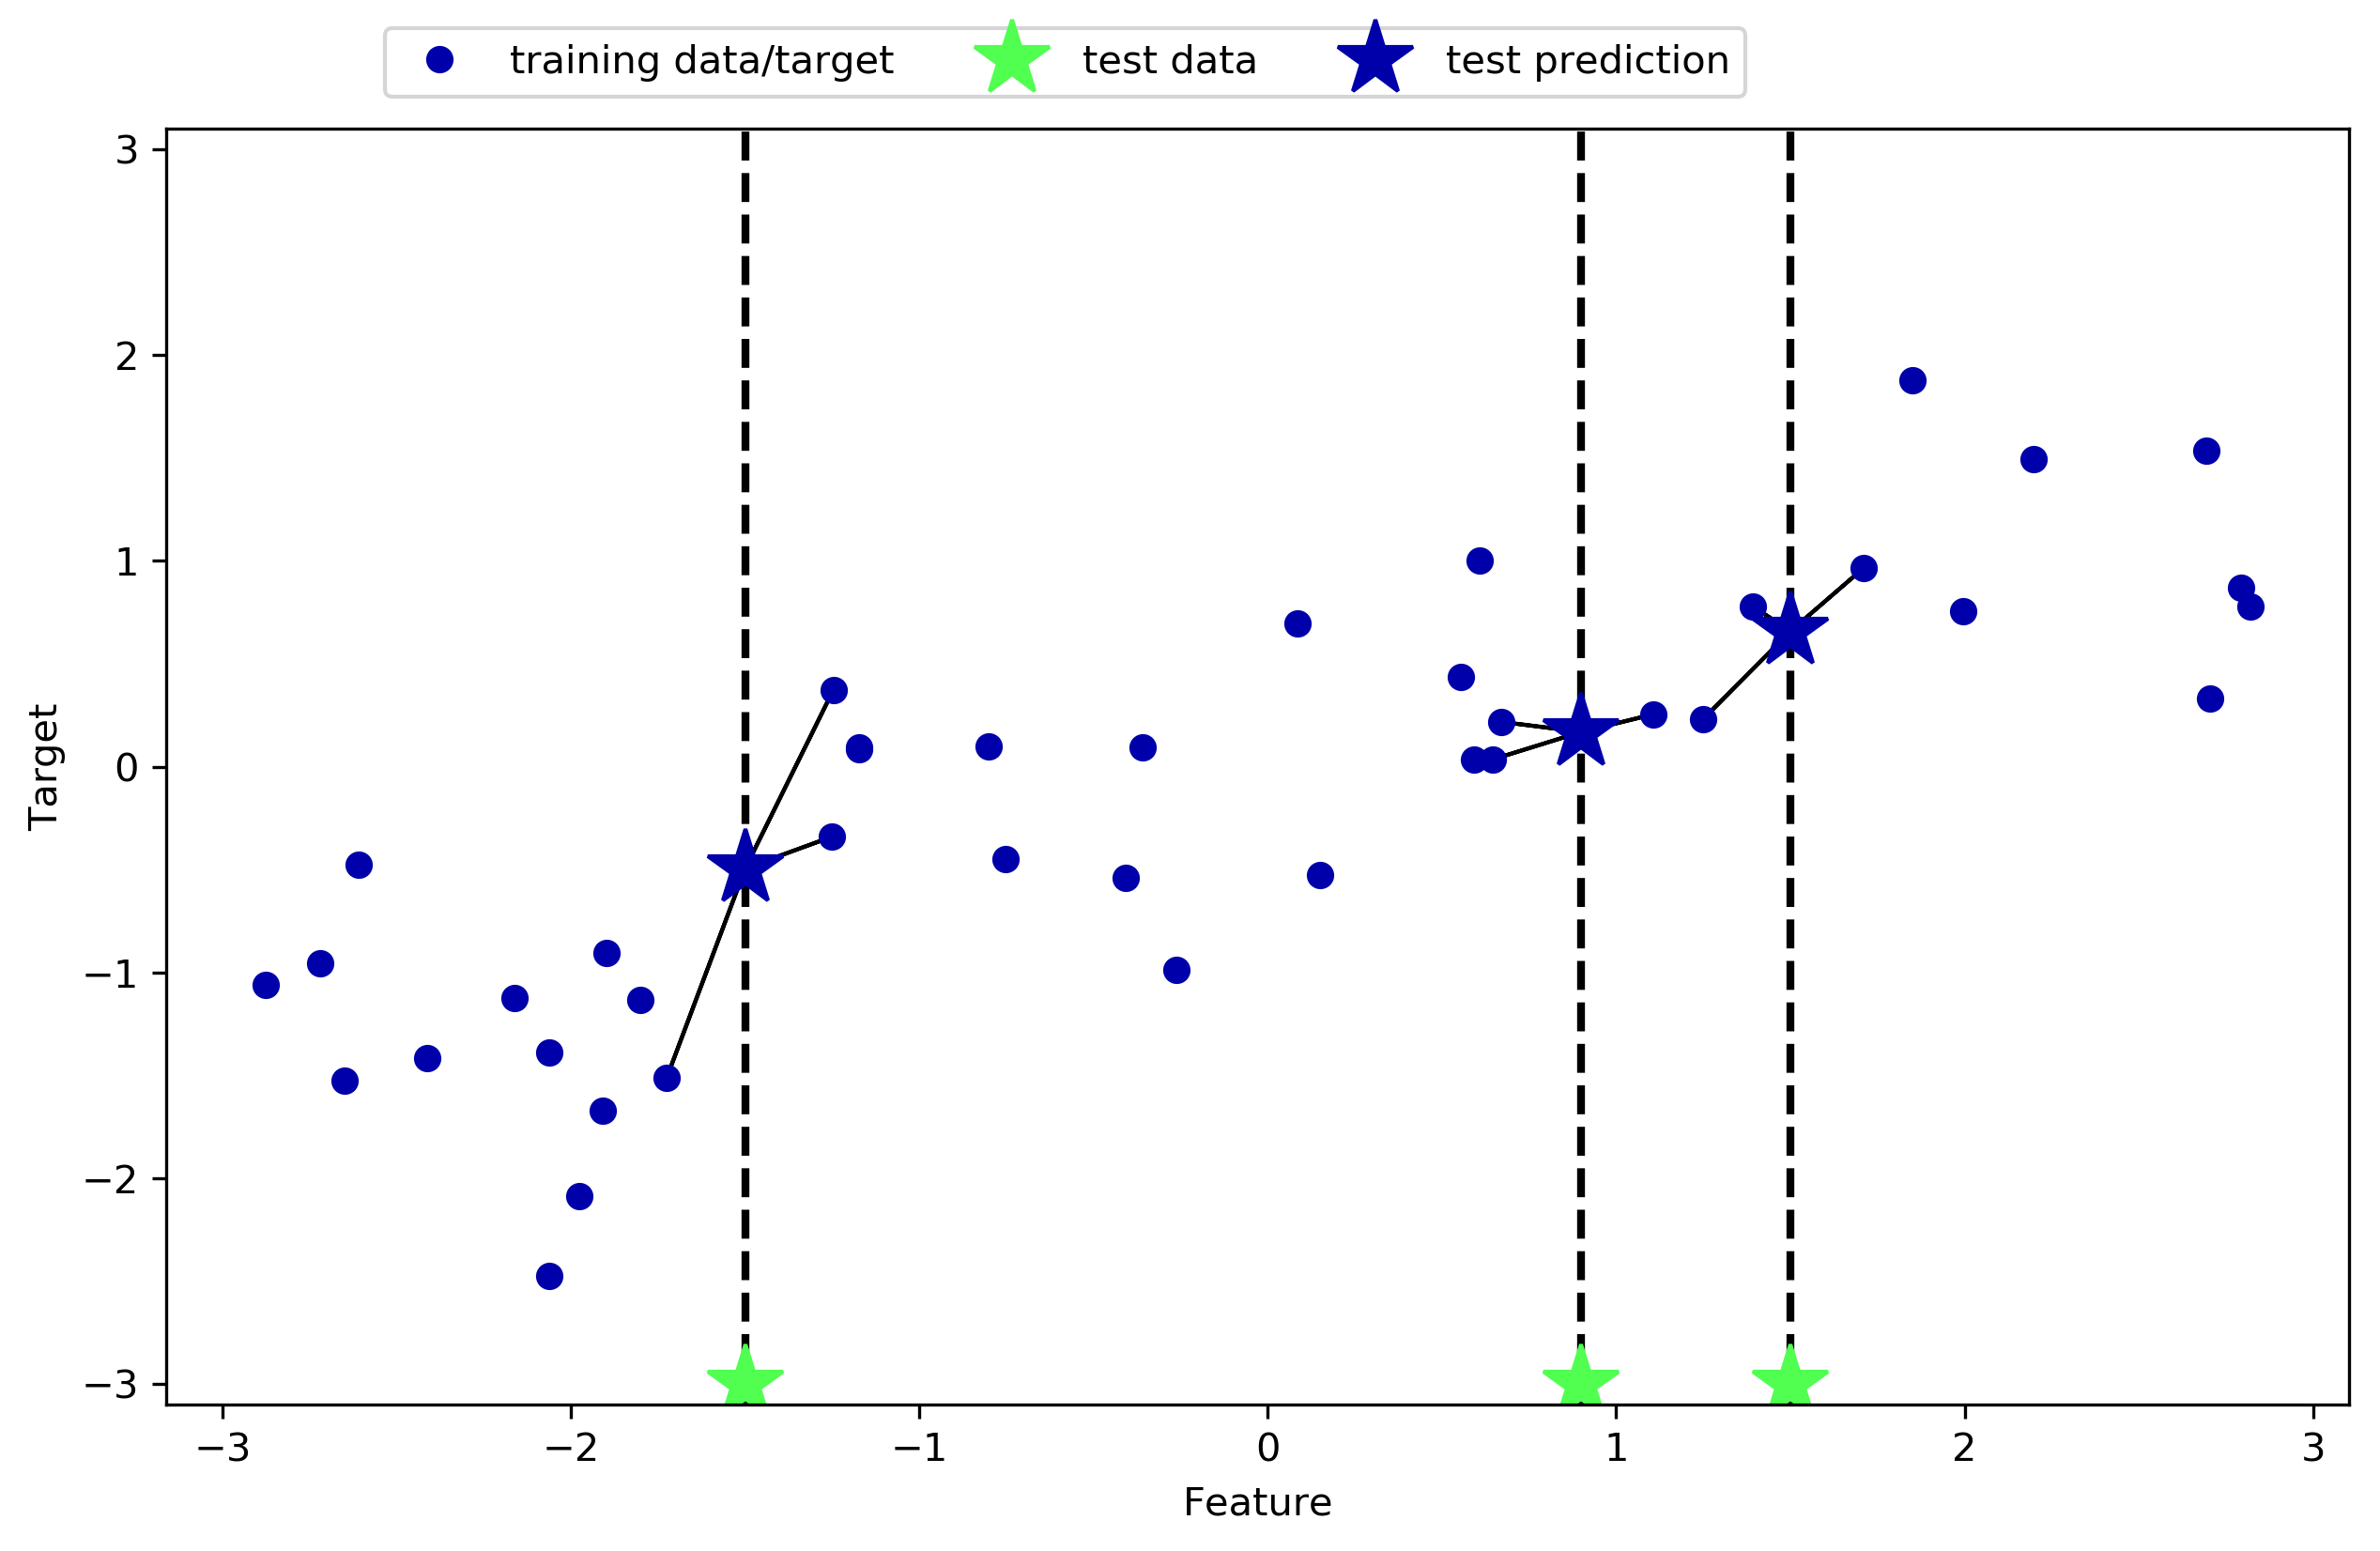

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3) # 세 이웃이 가진 값의 산술평균 값을 갖는다.

In [46]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets:
print(reg.fit(X_train, y_train))
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')
Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


<img src="../image/IMG_0466.jpg"></img>
- 현재 디폴트로 weights='uniform'로 되어있다.
- 이를 weights='distance'로 바꿀 수도 있다.

In [48]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(
    n_neighbors=3, 
    weights='distance', # (default)
    
    p=2, 
    # (default). power. 제곱. 즉 유클리디안 거리.
    # power = 1 -> 절대값
    
    metric='minkowski'
)

# fit the model using the training data and training targets:
print(reg.fit(X_train, y_train))
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='distance')
Test set predictions:
[-0.28506983  0.25932073  1.34209224 -2.46936184 -1.12263664 -1.67167334
  0.36023725  0.88023319 -0.2060444  -1.15798731]
Test set R^2: 0.62


- 회귀에서는 R^2값이 반환됨
- 결정 계수라고 부름
- 예측의 정확도를 0과 1사이의 값의 확률로 계산함
<img src="../image/IMG_0467.jpg"></img>

### Analyzing KNeighborsRegressor

- 1000개의 데이터를 만들어서 kNN을 이용한 regression을 수행해보자

In [51]:
np.linspace(-3, 3, 1000).shape

(1000,)

In [52]:
np.linspace(-3, 3, 1000).reshape(-1, 1).shape

(1000, 1)

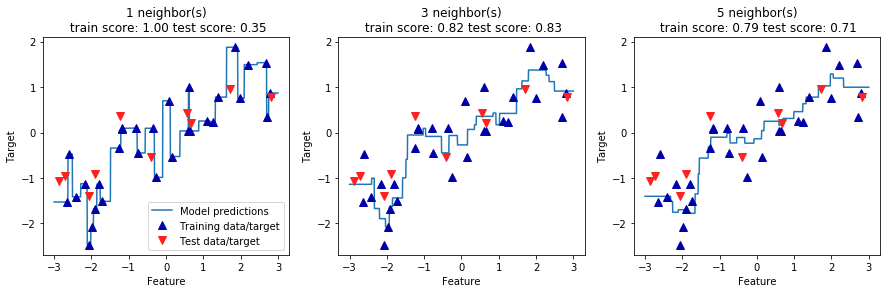

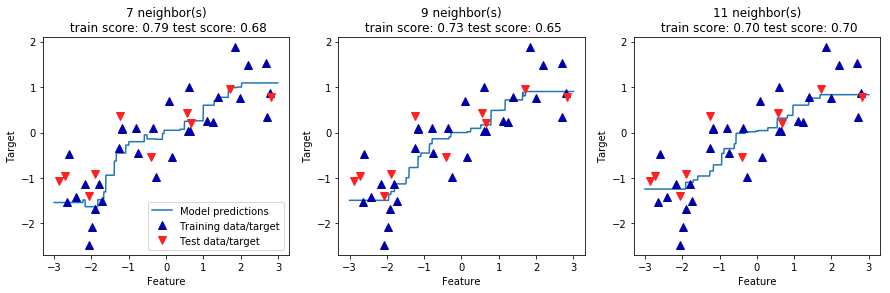

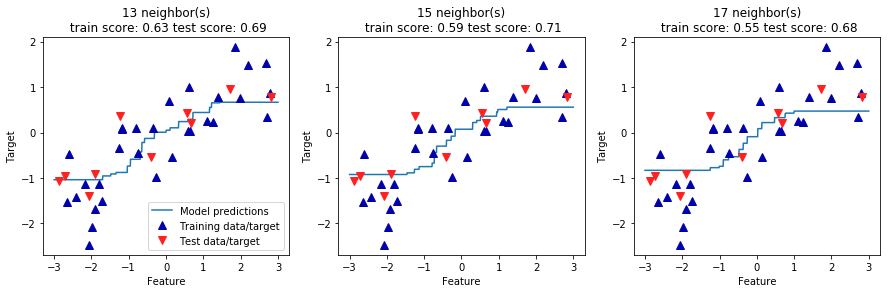

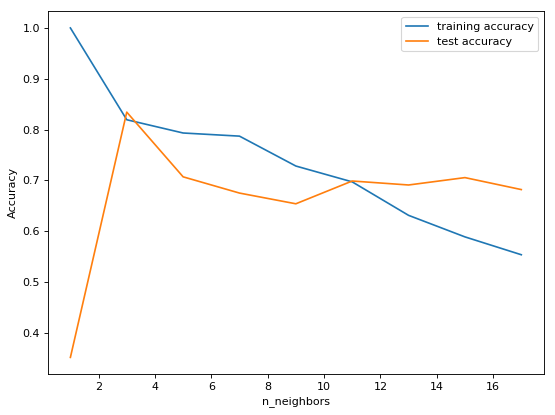

In [60]:
training_accuracy_2 = []
test_accuracy_2 = []

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # transpose 시킴
for n_neighbors, ax in zip([1, 3, 5], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, 
            reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    training_accuracy_2.append(reg.score(X_train, y_train))
    test_accuracy_2.append(reg.score(X_test, y_test))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # transpose 시킴
for n_neighbors, ax in zip([7, 9, 11], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, 
            reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    training_accuracy_2.append(reg.score(X_train, y_train))
    test_accuracy_2.append(reg.score(X_test, y_test))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # transpose 시킴
for n_neighbors, ax in zip([13, 15, 17], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, 
            reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    training_accuracy_2.append(reg.score(X_train, y_train))
    test_accuracy_2.append(reg.score(X_test, y_test))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.show()

neighbors_settings = range(1, 18, 2)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(neighbors_settings, training_accuracy_2, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy_2, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

- k=3일 때 정확도가 가장 높다.

### Strengths, weaknesses, and parameters
- Strengths
  - 이해하기 쉽다.
  - 더 복잡한 알고리즘을 적용해 보기 전에 시도해볼만한 알고리즘.

- Weaknesses
  - 훈련데이터가 많을 때 성능이 좋지 않음.
  - 수백개 이상의 다양한 특성을 지닌 데이터셋에 대해서는 성능이 좋지 않음.
  - 희소 (특성값 대부분이 0) 데이터셋에 대해 성능이 좋지 않음.
  - 데이터 전처리 작업이 중요 (3장 참고)
    - 거리를 계산할 때마다 값의 범위가 다를 경우 영향을 크게 받기 때문에, 정규화 작업이 필수적으로 필요함